In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n = int(input())
arr = list(map(int,input().split()))
e_arr = []
odd_arr = []
temp = [e_arr.append(i) if i%2==0 else odd_arr.append(i) for i in arr]
arr = e_arr+odd_arr
print(" ".join(list(map(str,e_arr+odd_arr))))

8
1 2 3 4 5 6 7 8
2 4 6 8 1 3 5 7


In [ ]:
s1,s2 = input(),input()
print(len(s1)*2 if s1==s2 else 0)

In [56]:
covid = pd.read_csv("Covid_Dataset.csv")

# Analyzing dataset

In [14]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

### Note : since there are no null values in data, we are skipping null values processing

In [15]:
covid.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


# Finding Missing Values

In [16]:
# create a table with data missing 
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


# Data Visualization

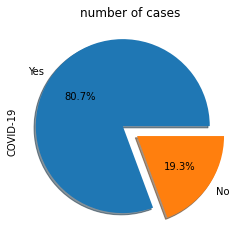

In [17]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

## Encoding Data

In [57]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [58]:
for i in covid.columns:
    covid[i] = e.fit_transform(covid[i])

In [59]:
covid.head(10)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
5,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,1,0,0,0,1,0,1,1,...,1,1,0,0,1,1,1,0,0,1
7,1,1,1,0,1,1,0,0,0,1,...,0,1,1,0,0,1,0,0,0,1
8,1,1,1,0,1,0,1,0,0,1,...,1,0,1,1,1,0,0,0,0,1
9,1,1,1,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


## Plotting data

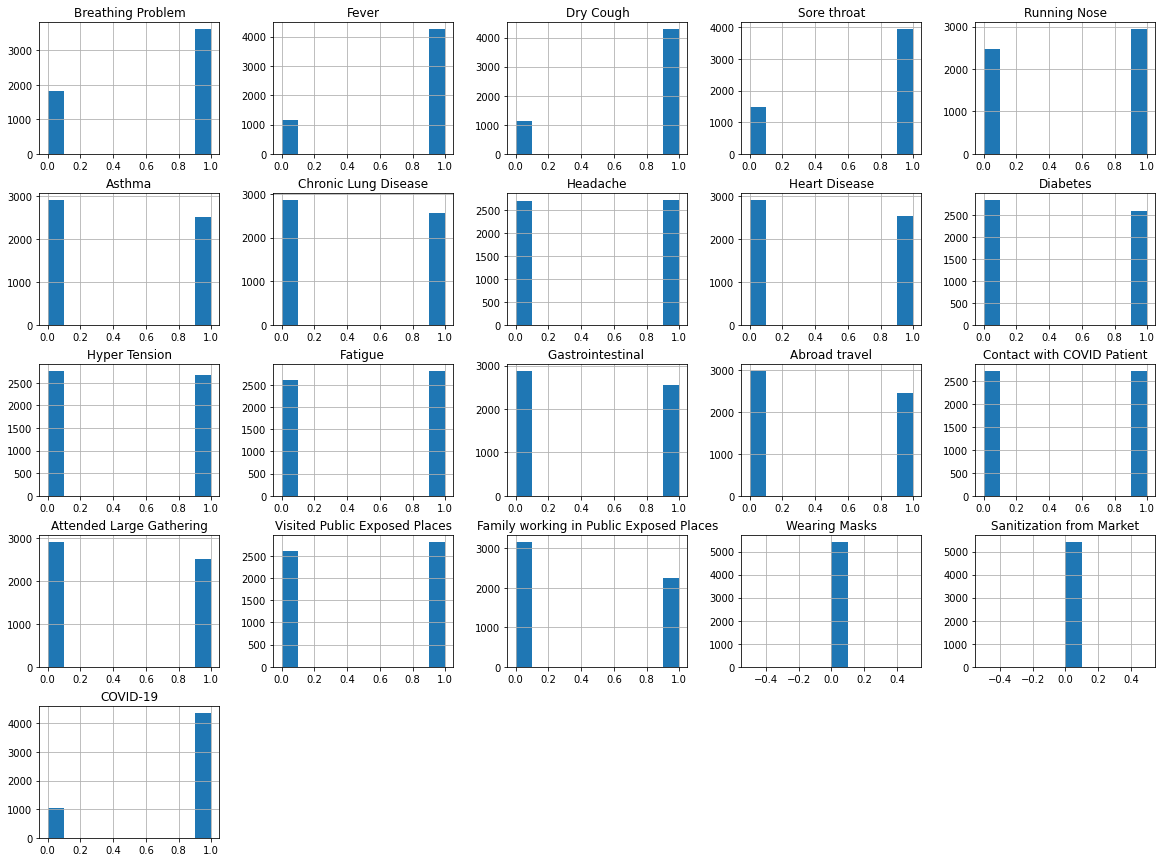

In [21]:
covid.hist(figsize=(20,15));

# Correlation Between Parameters

In [60]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)


,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


## Removing Unwanted Parameters

### Note : unwanted parameters are selected from above correlation graph

In [61]:
rem = ['Running Nose','Chronic Lung Disease','Headache','Heart Disease','Diabetes','Gastrointestinal ',
       'Wearing Masks','Sanitization from Market', 'Asthma', 'Fatigue ']
for i in rem:
    covid = covid.drop(i, axis = 1)


## Correlation graph after removing unwanted parameters

In [62]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


In [353]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm

In [354]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']
                            

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state = 10)

In [417]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5429    1
5430    1
5431    0
5432    0
5433    0
Name: COVID-19, Length: 5434, dtype: int64

In [357]:
model = LogisticRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(model.score(x_test, y_test)*100)
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

97.148114075437
0.9865319865319865
0.9788418708240535
0.9826718837339296


[Text(0, 0.5, 'Non-Covid'), Text(0, 1.5, 'Covid')]

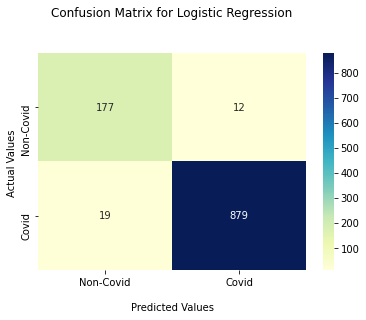

In [358]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.set_title('Confusion Matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Non-Covid','Covid'])
ax.yaxis.set_ticklabels(['Non-Covid','Covid'])


In [359]:
t = tree.DecisionTreeClassifier()

t.fit(x_train,y_train)
y_pred = t.predict(x_test)
print(t.score(x_test, y_test)*100)
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

97.88408463661453
0.9844961240310077
0.9899777282850779
0.9872293170460855


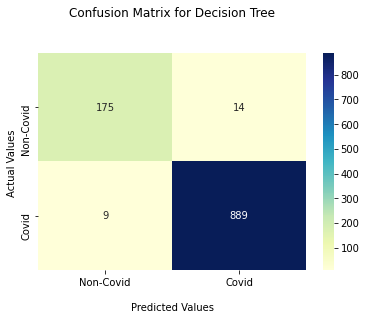

In [360]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.set_title('Confusion Matrix for Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Non-Covid','Covid'])
ax.yaxis.set_ticklabels(['Non-Covid','Covid'])

plt.show()

In [361]:

clf = svm.SVC(kernel='linear',C=1,gamma=1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(clf.score(x_test, y_test)*100)
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))

97.60809567617295
0.9718614718614719
1.0
0.9857299670691548


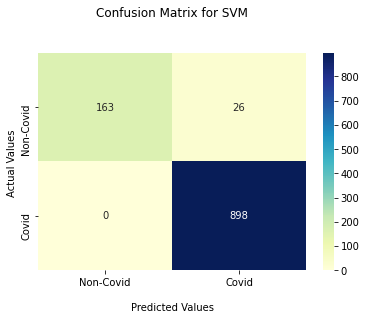

In [362]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

ax.set_title('Confusion Matrix for SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Non-Covid','Covid'])
ax.yaxis.set_ticklabels(['Non-Covid','Covid'])

plt.show()

In [363]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Reshape
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [364]:
x2 = x.values
y2 = y.values
x2 = x2.reshape(*x2.shape,1)
y2 = y2.reshape(*y2.shape,1)

In [365]:
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder='passthrough')
y2 = ct.fit_transform(y2)
y2 = y2.reshape(*y2.shape,1)

In [366]:
print(x2.shape,y2.shape)

(5434, 10, 1) (5434, 2, 1)


In [367]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.20,random_state=10)

In [368]:
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, Activation, BatchNormalization,Reshape
from keras.models import Model, Sequential,load_model
from keras.regularizers import l2

In [373]:
def Digit_model(input_shape = (10, 1), classes = 2):
    
    model = Sequential([
        
    Conv1D(filters = 32, kernel_size = 2, strides = 1, activation = 'relu', input_shape = (10,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    
    Conv1D(filters = 32, kernel_size = 2, strides = 1, name = 'convolution_2', use_bias=False),
       
    BatchNormalization(name = 'batchnorm_1'),
    Activation("relu"),
    MaxPooling1D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'), 
    
    
    Conv1D(filters = 64, kernel_size = 2, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
    
    BatchNormalization(name = 'batchnorm_2'),
    Activation("relu"),
    MaxPooling1D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.5, name = 'dropout_2'), 
    
        
    
    
    Dense(units = 2, activation = 'softmax', name = 'output'),
    Reshape((2,1)),
        
    ])
    
    model._name = 'Digit_model'

    return model


In [374]:
Digit_model = Digit_model(input_shape = (10, 1), classes = 2)

Digit_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Digit_model.summary()

Model: "Digit_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv1D)       (None, 9, 32)             96        
_________________________________________________________________
convolution_2 (Conv1D)       (None, 8, 32)             2048      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 8, 32)             128       
_________________________________________________________________
activation_53 (Activation)   (None, 8, 32)             0         
_________________________________________________________________
max_pool_1 (MaxPooling1D)    (None, 4, 32)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 32)             0         
_________________________________________________________________
convolution_3 (Conv1D)       (None, 3, 64)             

In [375]:
history = Digit_model.fit(x2_train, y2_train, epochs = 50, batch_size = 75, validation_data = (x2_test,y2_test), verbose=1)

Epoch 1/50
58/58 [==============================] - 2s 9ms/step - loss: 0.7038 - accuracy: 0.7641 - val_loss: 0.5868 - val_accuracy: 0.8261
Epoch 2/50
58/58 [==============================] - 0s 5ms/step - loss: 0.2617 - accuracy: 0.9082 - val_loss: 0.6094 - val_accuracy: 0.8261
Epoch 3/50
58/58 [==============================] - 0s 5ms/step - loss: 0.2296 - accuracy: 0.9266 - val_loss: 0.5589 - val_accuracy: 0.8399
Epoch 4/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.9365 - val_loss: 0.4999 - val_accuracy: 0.9218
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1797 - accuracy: 0.9439 - val_loss: 0.3649 - val_accuracy: 0.9650
Epoch 6/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1880 - accuracy: 0.9376 - val_loss: 0.2698 - val_accuracy: 0.9733
Epoch 7/50
58/58 [==============================] - 0s 5ms/step - loss: 0.1582 - accuracy: 0.9531 - val_loss: 0.1901 - val_accuracy: 0.9733
Epoch 8/50
58/58 [==

In [377]:
y2_pred = Digit_model.predict(x2_test)
metric = keras.metrics.BinaryAccuracy()
metric.update_state(y2_test,y2_pred)
metric.result().numpy()

0.975161

## From all The models Decision Tree outperforms in accuracy

In [438]:
'''df = pd.read_csv("input_data.csv")
import random
temp =[]
sp = []
pulse = []
for i in range(df.shape[0]):
    if df['Fever'].iloc[i]=="Yes":
        temp.append(round(random.uniform(100,103),2))
    else:
        temp.append(round(random.uniform(96,99),2))
    if df["Breathing Problem"].iloc[i]=="Yes":
        sp.append(random.randrange(75,90))
    else:
        sp.append(random.randrange(90,98))
    pulse.append(random.randrange(40,120))

df = df.assign(Spo2=sp,heart_beat= pulse,body_temperature = temp)
df.head()
df.to_csv('input_data.csv',encoding = 'utf-8')'''

In [463]:
df = pd.read_csv("input_data.csv")
data = df.iloc[:,:-3].values
cl_data = df.iloc[:,-3:].values
e = LabelEncoder()
for i in range(data.shape[1]):
    data[:,i] = e.fit_transform(data[:,i])
    
model = t
y_pred = t.predict(data)
covid_patients_list = []
for i in range(len(y_pred)):
    if y_pred[i]:
        if (cl_data[i,1] > 100 or 30<cl_data[i,1]<60) and cl_data[i,0] < 90 and cl_data[i,2] > 100.4 :
            temp = df.iloc[i].values
            temp = np.append(temp,"SEVERE")
            covid_patients_list.append(temp)
        elif (cl_data[i,1] > 100 or 30<cl_data[i,1]<60) or cl_data[i,0] < 90 or cl_data[i,2] > 100.4 :
            temp = df.iloc[i].values
            temp = np.append(temp,"MODERATE")
            covid_patients_list.append(temp)
        else:
            temp = df.iloc[i].values
            temp = np.append(temp,"MILD")
            covid_patients_list.append(temp)
covid_patients_list = np.array(covid_patients_list)
df_update = pd.DataFrame(covid_patients_list,columns=["Breathing Problem","Fever","Dry Cough","Sore throat","Hyper Tension","Abroad travel","Contact with COVID Patient","Attended Large Gathering","Visited Public Exposed Places","Family working in Public Exposed Places","Spo2","heart_beat","body_temperature","Covid Condition"])
df_update.to_csv('classified_covid_patients_data.csv',encoding = 'utf-8')
df_update.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Spo2,heart_beat,body_temperature,Covid Condition
0,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,77,52,100.71,SEVERE
1,Yes,Yes,Yes,Yes,No,No,No,Yes,Yes,No,89,111,100.17,MODERATE
2,Yes,Yes,Yes,Yes,No,Yes,No,No,No,No,88,101,100.24,MODERATE
3,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,No,84,88,100.71,MODERATE
4,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,78,103,102.18,SEVERE


In [459]:
print(np.array(covid_patients_list))

[['Yes' 'Yes' 'Yes' ... 52 100.71 'SEVERE']
 ['Yes' 'Yes' 'Yes' ... 111 100.17 'MODERATE']
 ['Yes' 'Yes' 'Yes' ... 101 100.24 'MODERATE']
 ...
 ['Yes' 'Yes' 'No' ... 90 101.62 'MODERATE']
 ['Yes' 'Yes' 'Yes' ... 95 100.75 'MODERATE']
 ['Yes' 'Yes' 'No' ... 110 102.76 'SEVERE']]


In [4]:
import smtplib
 
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
print("modules imported sucessfully")
 

me = "mailid@gmail.com"
 
l_mail=["tejavardhan7654@gmail.com",     
"18691a04j8@gmail.com",        
"devisree2jampana@gmail.com",        
"harinireddipm@gmail.com",
"vivekvardhan261@gmail.com"
]

l_name=["P. Teja vardhan",
"Prakash",
"DeviSree",
"Harini Reddy",
"Vivek Vardhan",
]
l_state = ["MILD",
          "MODERATE",
          "SEVERE",
          "SEVERE",
          "MILD"]
l_ids=["210101", "210102", "210103", "210104", " 210105"]

msg = MIMEMultipart('alternative')
msg['Subject'] = "Covid Test Update"
msg['From'] = me
 

s = smtplib.SMTP('smtp.gmail.com',587)
s.starttls()
 
 
 
s.login(me,"password")
print("Login sucessfully completed")
 
 
 
for z in range(len(l_mail)):
    p_name=l_name[z]
    p_id=l_ids[z]
    p_state = l_state[z]
    html = """\
    <!DOCTYPE html>
 <html>
 <head>
    Medical Emergency
 </head>
 <style>
    /* Your light mode (default) styles: */
    body {
        background: white;
        color: #393939;
    }
    #header {
        color: orange;
        text-align: center;
    }
    #body {
        color: black;
    }
    #p1 {
        color: green;
        
    }
   #p2,#p3 {
        color: red;
        
    }
   #p4 {
        color: black;
        text-align: center;
    }
   #p5 {
        color: purple;
        
    }
   #p6 {
        color: red;
        
    }
   @media (prefers-color-scheme: dark) {
        /* Your dark mode styles: */
 
        body {
            background: black;
            color: #ccc;
        }
        #header {
        color: yellow;
        text-align: center;
        }
        #body {
        color: white;
        
        }
        #p1 {
        color: cyan;
        
        }
        #p2,#p3 {
        color: cyan;
        
        }
        #p4 {
        color: white;
        text-align: center;
        }
        #p5 {
        color: yellow;
        
        }
        #p6 {
        color: red;
        
        }
    }
 
 </style>
 <body>
    <p><h1 id="header">Covid Test Result</h1></p>
   <p id="body">
      Dear %s <br>
      Urgent remainder from government of Andhra Pradesh<br>
      It is informing that You have tested positive for Covid-19. You have Covid-19 in %s level.<br>
      <br><br>
    </p>
    <p id="p1">Name: <p id="p2">%s.</p><br><p id="p1">Patient Id:</p><p id="p3"> %s.</p></p>
    <p id="p4"><br>====Take Precautions and Medication====<br></p>
    <p id="p5">Thanks and Regards<br>Dr. Rajasekaran<br>HOD of medical dept.<br></p>
    <p id="p6"><br>Note : Do not give replay to this mail, it is auto generated.<br></p>
 
 </body>
 
 </html>"""%(p_name,p_state,p_name,p_id)
    part2 = MIMEText(html, 'html')
    msg.attach(part2)

    s.sendmail(me, l_mail[z], msg.as_string())
    print("mail sent to %s (%s)"%(p_name,l_mail[z]))

s.quit()
print("All Mails Sent Succesfully")

modules imported sucessfully
Login sucessfully completed
mail sent to P. Teja vardhan (tejavardhan7654@gmail.com)
mail sent to Prakash (18691a04j8@gmail.com)
mail sent to DeviSree (devisree2jampana@gmail.com)
mail sent to Harini Reddy (harinireddipm@gmail.com)
mail sent to Vivek Vardhan (vivekvardhan261@gmail.com)
All Mails Sent Succesfully
